In [1]:
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# Reading Combined Dataset

In [2]:
df = pd.read_excel('./datasets/combined.xlsx', index_col=0)
df.head()

,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3


In [3]:
df_one_hot_encoded = df.copy()

In [4]:
features_df = pd.get_dummies(df_one_hot_encoded, columns=['Dwelling Type', 'Month', 'Towns', 'Region'])
del features_df['Avg kWh']
del features_df['Highest 30 min Rainfall (mm)']
del features_df['Highest 60 min Rainfall (mm)']
features_df

,Year,Daily Rainfall Total (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Dwelling Type_1-room / 2-room,Dwelling Type_3-room,...,Towns_Tanglin,Towns_Toa Payoh,Towns_West Region,Towns_Woodlands,Towns_Yishun,Region_Central Region,Region_East Region,Region_North East Region,Region_North Region,Region_West Region
0,2005,2.9,5.0,27.5,31.3,25.1,7.2,35.3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2005,2.9,5.0,27.5,31.3,25.1,7.2,35.3,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2005,2.9,5.0,27.5,31.3,25.1,7.2,35.3,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2005,2.9,5.0,27.5,31.3,25.1,7.2,35.3,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2005,2.9,5.0,27.5,31.3,25.1,7.2,35.3,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60563,2021,9.8,9.4,28.1,32.7,24.5,8.6,31.9,0,0,...,0,0,0,0,0,0,0,0,0,1
60564,2021,7.5,6.7,28.2,32.1,25.2,4.9,26.5,0,0,...,0,0,0,0,0,0,0,0,0,1
60565,2021,8.5,7.9,28.2,32.4,24.9,6.7,29.2,0,0,...,0,0,0,0,0,0,0,0,0,1
60566,2021,8.5,7.9,28.2,32.4,24.9,6.7,29.2,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting Of Train Test Datasets

In [5]:
# apply normalization techniques
for column in features_df.columns:
    features_df[column] = (features_df[column] - features_df[column].min()) / (features_df[column].max() - features_df[column].min())

In [6]:
# Training and testing only accept matrix not data frame
X = features_df
y = df_one_hot_encoded['Avg kWh']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Selection on Dataset

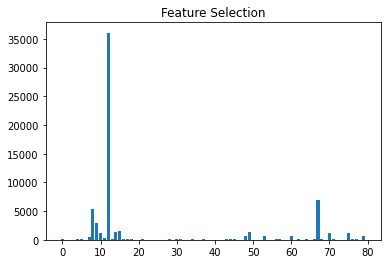

In [8]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
fs_value_list = []
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    fs_value_list.append(fs.scores_[i])
# plot the scores
pyplot.title('Feature Selection')
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [9]:
col_names = list(X_train.columns)
metric_data = []
metric_data.append(col_names)
metric_data.append(fs_value_list)
temp_df = pd.DataFrame(metric_data).transpose().sort_values(by=[1], ascending=False)
temp_df.rename(columns={0: "Attribute", 1: "Feature Selection Score"}, inplace=True)
temp_df

,Attribute,Feature Selection Score
12,Dwelling Type_Landed Properties,36065.562626
67,Towns_Southern Islands,6886.587289
8,Dwelling Type_1-room / 2-room,5435.107081
9,Dwelling Type_3-room,2882.627239
15,Dwelling Type_Public Housing,1473.670556
...,...,...
24,Month_9,0.860935
78,Region_North Region,0.520659
19,Month_4,0.492642
2,Highest 120 min Rainfall (mm),0.464883


In [10]:
col_names = list(X_train.columns)
metric_data = []
metric_data.append(col_names)
metric_data.append(fs_value_list)
temp_df = pd.DataFrame(metric_data).transpose().sort_values(by=[1], ascending=False)
temp_df.rename(columns={0: "Attribute", 1: "Feature Selection Score"}, inplace=True)
pd.set_option('display.max_rows', df.shape[0]+1)
temp_df

,Attribute,Feature Selection Score
12,Dwelling Type_Landed Properties,36065.562626
67,Towns_Southern Islands,6886.587289
8,Dwelling Type_1-room / 2-room,5435.107081
9,Dwelling Type_3-room,2882.627239
15,Dwelling Type_Public Housing,1473.670556
14,Dwelling Type_Private Housing,1381.645831
49,Towns_Newton,1325.187302
75,Region_Central Region,1249.204536
70,Towns_Tanglin,1227.826924
10,Dwelling Type_4-room,1219.662593
